Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step
EPOCH: 10, LR: 0.0100, Momentum:0.90, Decay: 0.000010, Nesterov: 0
Epoch 1/10
 - 34s - loss: 0.7908 - accuracy: 0.7064 - val_loss: 0.6794 - val_accuracy: 0.7514
Epoch 2/10
 - 27s - loss: 0.5863 - accuracy: 0.7825 - val_loss: 0.5915 - val_accuracy: 0.7957
Epoch 3/10
 - 27s - loss: 0.5181 - accuracy: 0.8077 - val_loss: 0.4313 - val_accuracy: 0.8453
Epoch 4/10
 - 26s - loss: 0.4825 - accuracy: 0.8218 - val_loss: 0.4403 - val_accuracy: 0.8363
Epoch 5/10
 - 27s - loss: 0.4570 - accuracy: 0.8325 - val_loss: 0.4253 - val_accuracy: 0.8331
Epoch 6/10
 - 26s - loss: 0.4346 - accuracy: 0.8406 - val_loss: 0.4514 - val_accuracy: 0.8350
Epoch 7/10
 - 26s - loss: 0.4227 - accuracy: 0.8436 - val_loss: 0.4589 - val_accuracy: 0.8375
Epoch 8/10
 - 26s - loss: 0.4088 - accuracy: 0.8499 - val_loss: 0.3765 - val_accuracy: 0.8646
Epoch 9/10
 - 27s - loss: 0.4004 - accuracy: 0.8531 - val_loss: 0.3737 - val_accuracy: 0.8651
Epoch 10/10
 - 27s - los

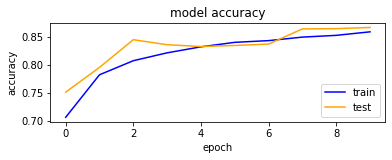

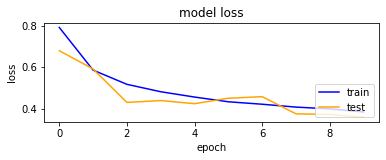

EPOCH: 10, LR: 0.0100, Momentum:0.90, Decay: 0.000010, Nesterov: 0


In [1]:

### FASHION MNIST WITH DATA AUGMENTATION ###

# Import libraries
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import losses
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

# Load training and test data into dataframes
(trainX, trainY), (testX, testY) =fashion_mnist.load_data()

# specify the arguments
rotation_range_val = 30
width_shift_val = 0.2
height_shift_val = 0.2
shear_range_val=45
zoom_range_val=[0.9,1.1]

# create the class object
datagen = ImageDataGenerator(rotation_range = rotation_range_val,width_shift_range = width_shift_val,height_shift_range = height_shift_val,zoom_range=zoom_range_val)
# fit the generator
datagen.fit(trainX.reshape(trainX.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 3
num= num_row*num_col

"""
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(trainX[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(trainY[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(trainX.reshape(trainX.shape[0], 28, 28, 1),trainY.reshape(trainY.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()
"""

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainY = to_categorical(trainY)
testY = to_categorical(testY)

trainX= trainX.astype('float32')
testX = testX.astype('float32')

trainX = trainX / 255.0
testX = testX / 255.0

LearningRate = 0.01
EpochNum = 10
MomentumVal = 0.9
DecayVal = 0.00001
NestVal = False
LearningRateArray = []

print('EPOCH: %d, LR: %.4f, Momentum:%.2f, Decay: %f, Nesterov: %d' % (EpochNum, LearningRate, MomentumVal, DecayVal, NestVal))

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.2))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.2))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.2))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.2))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.2))

cnn4.add(Dense(10, activation='softmax'))
opt = SGD(lr=LearningRate, momentum=MomentumVal, nesterov=NestVal, decay=DecayVal )
cnn4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# define the learning rate change 
def exp_decay(epoch):
    lrate = LearningRate * np.exp(-DecayVal*epoch)
    LearningRateArray.append(lrate)
    return lrate

# learning schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lr_rate]


# create data generator
# datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
steps = int(trainX.shape[0] / 64)
history = cnn4.fit_generator(it_train, steps_per_epoch=steps, epochs=EpochNum, callbacks=callbacks_list , validation_data=(testX, testY), verbose=2)

plt.subplot(211)
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()
# summarize history for loss

print('EPOCH: %d, LR: %.4f, Momentum:%.2f, Decay: %f, Nesterov: %d' % (EpochNum, LearningRate, MomentumVal, DecayVal, NestVal))




In [0]:
cnn4.evaluate(testX, testY, batch_size=64, verbose=1, sample_weight=None, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)
cnn4.metrics_names

10000/10000 [==============================] - 1s 60us/step


['loss', 'accuracy']

In [0]:
from sklearn.metrics import classification_report
Y_pred = cnn4.predict(testX, batch_size=64, verbose=1)
Y_pred_bool = np.argmax(Y_pred, axis=1)

import numpy as np
Y_t=np.argmax(testY, axis=1)


print(classification_report(Y_t, Y_pred_bool))


10000/10000 [==============================] - 1s 60us/step
              precision    recall  f1-score   support

           0       0.59      0.64      0.62      1000
           1       0.98      0.89      0.94      1000
           2       0.60      0.60      0.60      1000
           3       0.82      0.24      0.38      1000
           4       0.44      0.59      0.51      1000
           5       0.98      0.79      0.87      1000
           6       0.32      0.20      0.25      1000
           7       0.80      0.94      0.86      1000
           8       0.56      0.97      0.71      1000
           9       0.88      0.92      0.90      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.66     10000
weighted avg       0.70      0.68      0.66     10000



In [0]:
fashion_classes     = {0: 'T-shirt/top', 
                       1: 'Trouser', 
                       2: 'Pullover', 
                       3: 'Dress', 
                       4: 'Coat',
                       5: 'Sandal', 
                       6: 'Shirt', 
                       7: 'Sneaker', 
                       8: 'Bag', 
                       9: 'Ankle boot'}



In [0]:
Y_pred_bool

array([9, 2, 1, ..., 8, 1, 7])

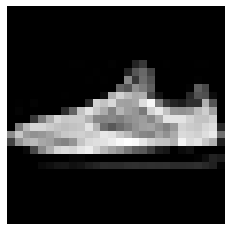

Predict Target : Sneaker
True Target : Sneaker


In [0]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

idx = np.random.randint(len(testX))
plt.imshow(np.squeeze(testX[idx]), cmap='gray')
plt.axis('off')
plt.show()

print("Predict Target :", fashion_classes[Y_pred_bool[idx]])
print("True Target :", fashion_classes[True_Y[idx]])

Predict Target : Coat
True Target : Coat


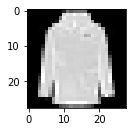

In [0]:
idx = np.random.randint(len(testX))
#plt.imshow(np.squeeze(testX[idx]), cmap='gray')
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(np.squeeze(testX[idx]), cmap='gray')
print("Predict Target :", fashion_classes[Y_pred_bool[idx]])
print("True Target :", fashion_classes[True_Y[idx]])


plt.show()


EPOCH: 10, LR: 0.0100, Momentum:0.90, Decay: 0.000000, Nesterov: 0
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_37 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_38 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 64)        18496     
_____________________________________________________

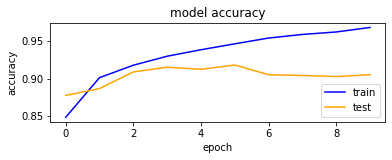

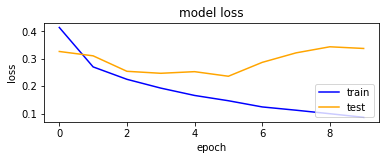

In [0]:

### FASHION MNIST WITHOUT DATA AUGMENTATION ###


from keras.utils import to_categorical
from keras.datasets import fashion_mnist
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import losses
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

# Load training and test data into dataframes
(trainX, trainY), (testX, testY) =fashion_mnist.load_data()



# create the class object
#datagen = ImageDataGenerator(rotation_range = rotation_range_val,width_shift_range = width_shift_val,height_shift_range = height_shift_val,zoom_range=zoom_range_val)
# fit the generator
#datagen.fit(trainX.reshape(trainX.shape[0], 28, 28, 1))
# define number of rows & columns



trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainY = to_categorical(trainY)
testY = to_categorical(testY)

trainX= trainX.astype('float32')
testX = testX.astype('float32')

trainX = trainX / 255.0
testX = testX / 255.0

LearningRate = 0.01
EpochNum = 10
MomentumVal = 0.9
DecayVal = 0
NestVal = False

print('EPOCH: %d, LR: %.4f, Momentum:%.2f, Decay: %f, Nesterov: %d' % (EpochNum, LearningRate, MomentumVal, DecayVal, NestVal))

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.2))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.2))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.2))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.2))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.2))

cnn4.add(Dense(10, activation='softmax'))
opt = SGD(lr=LearningRate, momentum=MomentumVal, nesterov=NestVal, decay=DecayVal )
cnn4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

cnn4.summary()

# create data generator
# datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
#it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
#steps = int(trainX.shape[0] / 64)
#history = cnn4.fit(trainX, trainY, steps_per_epoch=64, epochs=EpochNum, validation_data=(testX, testY), verbose=2)
history = cnn4.fit(trainX, trainY,
              batch_size=64,
              epochs=10,
              validation_data=(testX, testY),
              shuffle=False)

plt.subplot(211)
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

In [0]:
from sklearn.metrics import classification_report
Y_pred = cnn4.predict(testX, batch_size=64, verbose=1)
Y_pred_bool = np.argmax(Y_pred, axis=1)

import numpy as np
Y_t=np.argmax(testY, axis=1)


print(classification_report(Y_t, Y_pred_bool))

10000/10000 [==============================] - 1s 62us/step
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.76      0.94      0.84      1000
           3       0.88      0.95      0.91      1000
           4       0.90      0.74      0.82      1000
           5       0.98      0.98      0.98      1000
           6       0.85      0.62      0.72      1000
           7       0.97      0.97      0.97      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000



EPOCH: 1, LR: 0.0010, Momentum:0.90, Decay: 0.010000, Nesterov: 0
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_31 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_32 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 64)        18496     
______________________________________________________

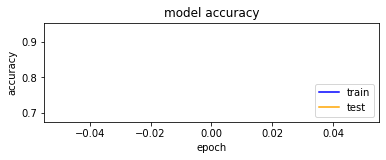

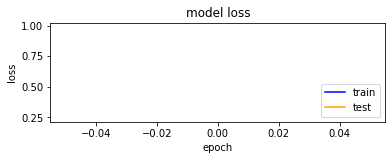

EPOCH: 1, LR: 0.0010, Momentum:0.90, Decay: 0.010000, Nesterov: 0


(60000, 28, 28, 1)

In [0]:

### MNIST WITH DATA AUGMENTATION ###

# Import libraries
from keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import losses
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# Load training and test data into dataframes
(trainX, trainY), (testX, testY) =mnist.load_data()

# specify the arguments
rotation_range_val = 30
width_shift_val = 0.2
height_shift_val = 0.2
shear_range_val=45
zoom_range_val=[0.9,1.1]

# create the class object
datagen = ImageDataGenerator(rotation_range = rotation_range_val,width_shift_range = width_shift_val,height_shift_range = height_shift_val,zoom_range=zoom_range_val)
# fit the generator
datagen.fit(trainX.reshape(trainX.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 3
num= num_row*num_col

"""
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(trainX[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(trainY[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(trainX.reshape(trainX.shape[0], 28, 28, 1),trainY.reshape(trainY.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()
"""

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainY = to_categorical(trainY)
testY = to_categorical(testY)

trainX= trainX.astype('float32')
testX = testX.astype('float32')

trainX = trainX / 255.0
testX = testX / 255.0

LearningRate = 0.001
EpochNum = 1
MomentumVal = 0.9
DecayVal = 1e-2
NestVal = False

print('EPOCH: %d, LR: %.4f, Momentum:%.2f, Decay: %f, Nesterov: %d' % (EpochNum, LearningRate, MomentumVal, DecayVal, NestVal))

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.2))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.2))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.2))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.2))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.2))

cnn4.add(Dense(10, activation='softmax'))
opt = SGD(lr=LearningRate, momentum=MomentumVal, nesterov=NestVal, decay=DecayVal )
cnn4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

cnn4.summary()

# create data generator
# datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
steps = int(trainX.shape[0] / 64)
history = cnn4.fit_generator(it_train, steps_per_epoch=steps, epochs=EpochNum, validation_data=(testX, testY), verbose=2)

plt.subplot(211)
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

print('EPOCH: %d, LR: %.4f, Momentum:%.2f, Decay: %f, Nesterov: %d' % (EpochNum, LearningRate, MomentumVal, DecayVal, NestVal))
trainX.shape

In [0]:
it_train.shape

AttributeError: ignored

In [0]:
from sklearn.metrics import classification_report
Y_pred = cnn4.predict(testX, batch_size=64, verbose=1)
Y_pred_bool = np.argmax(Y_pred, axis=1)

import numpy as np
Y_t=np.argmax(testY, axis=1)


print(classification_report(Y_t, Y_pred_bool))

10000/10000 [==============================] - 1s 70us/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.97      0.96      1032
           3       0.94      0.97      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.96      0.97      0.97       892
           6       0.98      0.97      0.97       958
           7       0.97      0.94      0.95      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.92      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
EPOCH: 10, LR: 0.0100, Momentum:0.90, Decay: 0.000000, Nesterov: 0
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)       

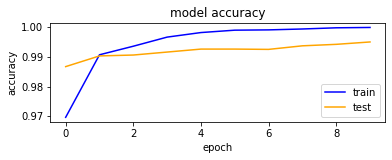

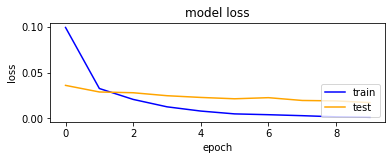

In [0]:

### MNIST WITHOUT DATA AUGMENTATION ###

from keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import losses
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

# Load training and test data into dataframes
(trainX, trainY), (testX, testY) =mnist.load_data()


# create the class object
#datagen = ImageDataGenerator(rotation_range = rotation_range_val,width_shift_range = width_shift_val,height_shift_range = height_shift_val,zoom_range=zoom_range_val)
# fit the generator
#datagen.fit(trainX.reshape(trainX.shape[0], 28, 28, 1))
# define number of rows & columns


trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainY = to_categorical(trainY)
testY = to_categorical(testY)

trainX= trainX.astype('float32')
testX = testX.astype('float32')

trainX = trainX / 255.0
testX = testX / 255.0

LearningRate = 0.01
EpochNum = 10
MomentumVal = 0.9
DecayVal = 0
NestVal = False

print('EPOCH: %d, LR: %.4f, Momentum:%.2f, Decay: %f, Nesterov: %d' % (EpochNum, LearningRate, MomentumVal, DecayVal, NestVal))

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.2))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.2))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.2))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.2))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.2))

cnn4.add(Dense(10, activation='softmax'))
opt = SGD(lr=LearningRate, momentum=MomentumVal, nesterov=NestVal, decay=DecayVal )
cnn4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

cnn4.summary()

# create data generator
# datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
#it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
#steps = int(trainX.shape[0] / 64)
#history = cnn4.fit(trainX, trainY, steps_per_epoch=64, epochs=EpochNum, validation_data=(testX, testY), verbose=2)
history = cnn4.fit(trainX, trainY,
              batch_size=64,
              epochs=10,
              validation_data=(testX, testY),
              shuffle=False)

plt.subplot(211)
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

In [0]:
from sklearn.metrics import classification_report
Y_pred = cnn4.predict(testX, batch_size=64, verbose=1)
Y_pred_bool = np.argmax(Y_pred, axis=1)

import numpy as np
Y_t=np.argmax(testY, axis=1)


print(classification_report(Y_t, Y_pred_bool))

10000/10000 [==============================] - 1s 67us/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       1.00      1.00      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       1.00      0.99      0.99     10000
weighted avg       1.00      0.99      0.99     10000

